In [1]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
from numpy import mean

from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
def count_and_plot(X, y):
    '''
    Counts the values of label y and plots the values of dataset X
    '''
    counter = Counter(y)
    print(counter)
    
    for label, _ in counter.items():
        row_ix = np.where(y == label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label= str(label))
    plt.legend()
    plt.show()
    
def classify_score(X, y):
    '''
    Determine the classification score
    '''
    
    model1 = DecisionTreeClassifier()
    model2 = DecisionTreeRegressor()
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores1 = cross_val_score(model1, X, y, scoring='roc_auc', cv= cv, n_jobs=-1)
    scores2 = cross_val_score(model1, X, y, scoring='roc_auc', cv= cv, n_jobs=-1)
    print(mean(scores1), mean(scores2))

In [3]:
def take_dataset():
    X, y = make_classification(n_samples= 10000, n_features=67, n_informative=50, n_redundant=3, n_classes= 2, 
                               n_clusters_per_class=5, weights=[0.9], flip_y= 0.10, 
                               class_sep= 0.65, random_state=20)
    
    return X, y

# weights= [1, 2, 3, 5, 5, 4, 3, 0.8]

In [4]:
X, y= take_dataset()

Counter({0: 8609, 1: 1391})


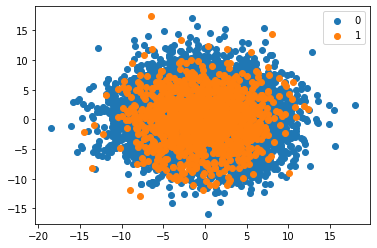

0.5292765526659784 0.5250818929978779


In [5]:
count_and_plot(X, y)
classify_score(X, y)

In [6]:
X, y= take_dataset()

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Counter({0: 8609, 1: 8609})


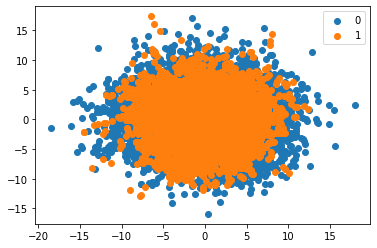

0.7770164042171982 0.776435864192529


In [7]:
count_and_plot(X, y)
classify_score(X, y)

In [8]:
X, y= take_dataset()

over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)

Counter({0: 3442, 1: 1721})


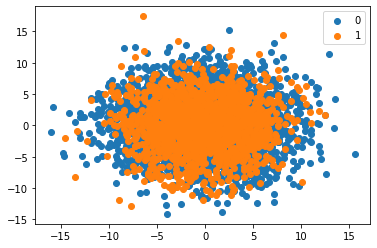

0.5815877194093279 0.5817301256337373


In [9]:
count_and_plot(X, y)
classify_score(X, y)

In [10]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    X, y= take_dataset()
    
    over = SMOTE(sampling_strategy=0.2, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.8)
    pipeline = Pipeline([('over', over), ('under', under)])
    X, y = pipeline.fit_resample(X, y)
    
    #count_and_plot(X, y)
    classify_score(X, y)

0.5772315657055991 0.5766499857275388
0.5761452612939149 0.5750711756027213
0.5777361221058851 0.5788439762745223
0.5774538198749003 0.5752590742151391
0.5803236031658311 0.577885707042796
0.571564369630194 0.5701311365360073
0.5731779107937978 0.569262796257296


In [11]:
X, y= take_dataset()

# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

Counter({0: 8609, 1: 8609})


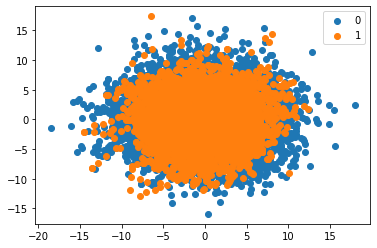

0.7870251825441842 0.7862314192078798


In [12]:
count_and_plot(X, y)
classify_score(X, y)

In [13]:
X, y= take_dataset()

# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

Counter({0: 8609, 1: 8609})


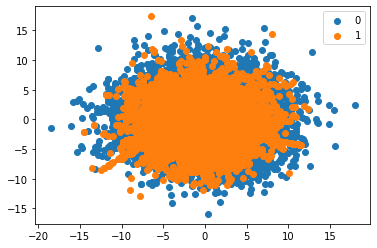

0.7928330137121968 0.7900456923173884


In [14]:
count_and_plot(X, y)
classify_score(X, y)

In [15]:
X, y= take_dataset()

# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)

Counter({0: 8609, 1: 8387})


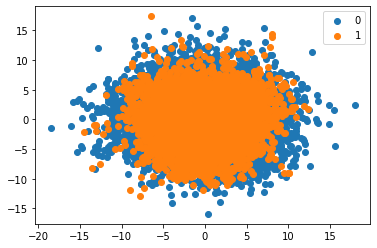

0.7742873979491812 0.7763334218864332


In [16]:
count_and_plot(X, y)
classify_score(X, y)